
Name: Shayna Nicholas Tuscano <br>


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
#importing dataset
dataset = pd.read_csv('Improved_All_Combined_hr_rsp_binary.csv')  

Understanding the Dataset :

In [ ]:
dataset.shape # rows = 112516 column = 5

In [ ]:
dataset.sample(6)  #Taking random samples from dataset 

Data Exploration :

In [ ]:
# To check if the data is imbalanced
dataset['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Data Preprocessing 

In [ ]:
#Identify and remove duplicate data 
dataset.duplicated().sum()

In [ ]:
#Handeling missing values
dataset.isnull().sum()

In [ ]:
#handel missing values by replacing it with mean 
n = dataset.isnull().any(axis=1)
i = n[n].index
i                    #index of missing values

In [ ]:
#mean of the HR column of entire dataset  to replace missing values in train and test
m = dataset['HR'].mean()
m                          

In [ ]:
#Replace the missing values in  dataset 
dataset =dataset.fillna(m)
#Verify that the missing values have been replaced 
dataset.isnull().sum()

In [ ]:
#Feature selection by finding the correlation with Label
c1 = dataset.corr()
c1['Label']

In [ ]:
#Removing unwanted columns like Participant and Time(sec)  from dataset 
dataset =dataset.drop(["Participant","Time(sec)"],axis = 1)

In [ ]:
dataset.head(2)

In [ ]:
#seperating Features and labels
X = dataset.drop('Label',axis = 1)
y = dataset.iloc[:,[-1]] 

In [ ]:
#importing Library for train test split 
from sklearn.model_selection import train_test_split
#spliting the data into Training data (80%) and Test data (20%)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.20,random_state = 20)

Algorithm Selection and Application :¶
<br>
1) Decision tree

In [ ]:
#importing the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import time

In [19]:
DT = DecisionTreeClassifier()
start = time.time()
DT.fit(X_train,y_train)
end = time.time()

In [20]:
#tain time in sec
train_time = end-start
train_time

0.31110405921936035

In [21]:
pstart = time.time()
y_predict = DT.predict(X_test)
pend = time.time()

In [22]:
#Prediction time 
pred_time = pend-pstart
pred_time

0.00648188591003418

In [23]:
y_predict

array([0, 1, 0, ..., 0, 1, 0])

In [24]:
#performance metrics 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [25]:
dt_performance =classification_report(y_test,y_predict)
print(dt_performance) #Decision Tree performance

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     15226
           1       0.55      0.57      0.56      7278

    accuracy                           0.71     22504
   macro avg       0.67      0.68      0.67     22504
weighted avg       0.71      0.71      0.71     22504



In [26]:
from sklearn.metrics import recall_score,accuracy_score
DT_recall =recall_score(y_test,y_predict)*100 # to. convert in percentage 
DT_recall

56.95245946688651

In [27]:
DT_accuracy =accuracy_score(y_test,y_predict)*100
DT_accuracy

71.24066832563099

In [28]:
#confusion matrix
DT_cm =confusion_matrix(y_test,y_predict,labels=[0,1])
DT_cm
tn, fp, fn, tp = DT_cm.ravel()
print(tn, fp, fn, tp )

11887 3339 3133 4145


Text(0.5, 1.0, 'Confusion matrix for decision tree')

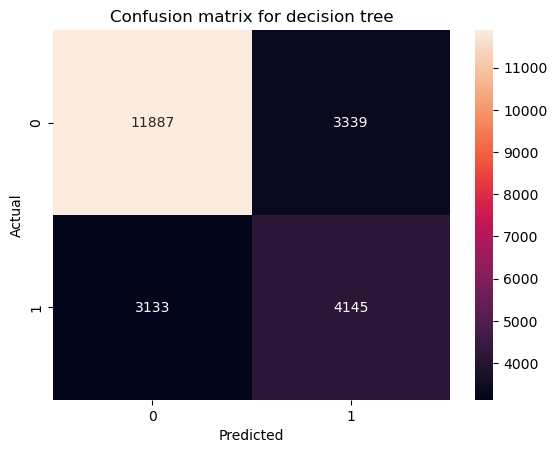

In [29]:
import seaborn as sns
sns.heatmap(DT_cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix for decision tree')

2. Random Forest 

In [30]:
#importing the Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [31]:
RF = RandomForestClassifier()
y_train1=y_train.values.ravel() # convert y_train dataframe into array because 1D array is expected  in .fit()
start1 = time.time()
RF.fit(X_train,y_train1)
end1 = time.time()


In [32]:
train_time1 = end1-start1  #training time for random forest 
train_time1

11.515777826309204

In [33]:
pstart1 = time.time()
y_predict1 = RF.predict(X_test)
pend1 = time.time()

In [34]:
#Prediction time 
pred_time1 = pend1-pstart1
pred_time1

0.5919947624206543

In [35]:
y_predict1 

array([0, 1, 0, ..., 0, 1, 0])

In [36]:
rf_performance =classification_report(y_test,y_predict1)
print(rf_performance) # Random Forest performance 

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     15226
           1       0.62      0.52      0.57      7278

    accuracy                           0.74     22504
   macro avg       0.71      0.68      0.69     22504
weighted avg       0.73      0.74      0.74     22504



In [37]:
RF_recall =recall_score(y_test,y_predict1)*100 #to. convert in percentage 

In [38]:
RF_accuracy =accuracy_score(y_test,y_predict1)*100
RF_accuracy

74.2979025950942

In [39]:
RF_recall

51.978565539983514

In [40]:
RF_cm =confusion_matrix(y_test,y_predict1,labels=[0,1])

tn, fp, fn, tp = RF_cm.ravel()
print(tn, fp, fn, tp )

12937 2289 3495 3783


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

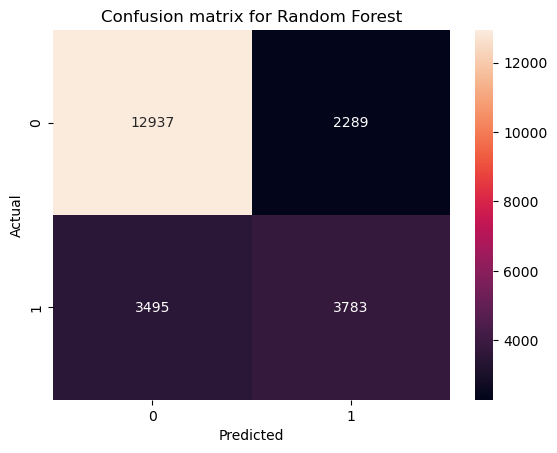

In [41]:
sns.heatmap(RF_cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix for Random Forest')

Text(0.5, 1.0, 'Evaluation of model based on appropriate performance metric')

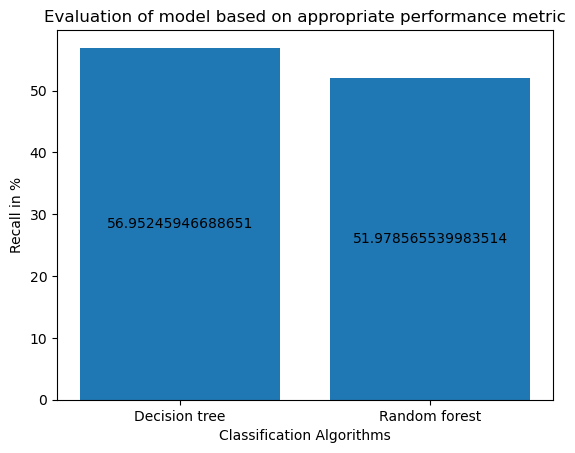

In [42]:
values=[DT_recall,RF_recall]
names = ['Decision tree','Random forest']
barplot = plt.bar(names, values)
plt.bar_label(barplot,values,label_type='center')
plt.xlabel('Classification Algorithms')
plt.ylabel('Recall in %')
plt.title('Evaluation of model based on appropriate performance metric')